# Pipeline Test

In [4]:
!git pull

remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 4 (delta 3), reused 4 (delta 3), pack-reused 0
Unpacking objects: 100% (4/4), 358 bytes | 39.00 KiB/s, done.
From https://github.com/nik875/SeqRep
   f301c0e..f6f38ab  master     -> origin/master
Updating f301c0e..f6f38ab
Fast-forward
 SeqRep/pipeline.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


In [2]:
from SeqRep.pipeline import KMerCountsPipeline
p = KMerCountsPipeline()
p.load_dataset(['SILVA_138.1_SSURef_NR99_tax_silva.fasta'], header_parser='SILVA')
p.create_kmer_counter(7, jobs=32, chunksize=100)
p.create_compressor('AE', repr_size=4**5, fit_sample_frac=.1, batch_size=4**5)
p.create_model(repr_size=32)

100%|██████████| 51050/51050 [00:04<00:00, 11055.43it/s]


AE Compressor Summary:
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16384)]           0         
                                                                 
 dense (Dense)               (None, 16384)             268451840 
                                                                 
 dense_1 (Dense)             (None, 1024)              16778240  
                                                                 
 dense_2 (Dense)             (None, 16384)             16793600  
                                                                 
 dense_3 (Dense)             (None, 16384)             268451840 
                                                                 
Total params: 570,475,520
Trainable params: 570,475,520
Non-trainable params: 0
_________________________________________________________________
Training AE Compressor

 dense_6 (Dense)             (None, 1024)              1049600   
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense_7 (Dense)             (None, 32)                32800     
                                                                 
Total params: 3,181,600
Trainable params: 3,181,600
Non-trainable params: 0
_________________________________________________________________


In [3]:
p.fit(preproc_batch_size=10, incremental_dist=True, jobs=32, chunksize=100, epochs=10, batch_size=1000)

Preprocessing dataset...


100%|██████████| 49/49 [04:12<00:00,  5.15s/it]


Training model...
Epoch 1:


100%|██████████| 510508/510508 [00:09<00:00, 51187.04it/s]


511/511 [==============================] - 8s 6ms/step - loss: 0.0881
Epoch time: 30.345932483673096
Epoch 2:


100%|██████████| 510508/510508 [00:09<00:00, 51354.59it/s]


511/511 [==============================] - 3s 6ms/step - loss: 0.0485
Epoch time: 24.32884192466736
Epoch 3:


100%|██████████| 510508/510508 [00:09<00:00, 51454.06it/s]


511/511 [==============================] - 3s 6ms/step - loss: 0.0424
Epoch time: 24.685081720352173
Epoch 4:


100%|██████████| 510508/510508 [00:09<00:00, 51655.15it/s]


511/511 [==============================] - 3s 6ms/step - loss: 0.0401
Epoch time: 24.393451929092407
Epoch 5:


100%|██████████| 510508/510508 [00:09<00:00, 51131.20it/s]


511/511 [==============================] - 3s 6ms/step - loss: 0.0387
Epoch time: 24.740623950958252
Epoch 6:


100%|██████████| 510508/510508 [00:09<00:00, 51288.58it/s]


511/511 [==============================] - 3s 6ms/step - loss: 0.0378
Epoch time: 24.59087109565735
Epoch 7:


100%|██████████| 510508/510508 [00:09<00:00, 51684.11it/s]


511/511 [==============================] - 3s 6ms/step - loss: 0.0377
Epoch time: 25.002793073654175
Epoch 8:


100%|██████████| 510508/510508 [00:10<00:00, 51033.09it/s]


511/511 [==============================] - 3s 6ms/step - loss: 0.0369
Epoch time: 29.861377954483032
Epoch 9:


100%|██████████| 510508/510508 [00:10<00:00, 50589.70it/s]


511/511 [==============================] - 3s 6ms/step - loss: 0.0363
Epoch time: 30.236165285110474
Epoch 10:


100%|██████████| 510508/510508 [00:09<00:00, 51367.05it/s]


511/511 [==============================] - 3s 6ms/step - loss: 0.0364
Epoch time: 29.850224494934082


In [4]:
p.transform_dataset()

2023-06-05 20:46:43.739816: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:776] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Did not find a shardable source, walked to a node which is not a dataset: name: "FlatMapDataset/_9"
op: "FlatMapDataset"
input: "PrefetchDataset/_8"
attr {
  key: "Targuments"
  value {
    list {
    }
  }
}
attr {
  key: "_cardinality"
  value {
    i: -2
  }
}
attr {
  key: "f"
  value {
    func {
      name: "__inference_Dataset_flat_map_slice_batch_indices_41996"
    }
  }
}
attr {
  key: "metadata"
  value {
    s: "\n\022FlatMapDataset:749"
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: -1
        }
      }
    }
  }
}
attr {
  key: "output_types"
  value {
    list {
      type: DT_INT64
    }
  }
}
experimental_type {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_DATASET
    args {
      type_id: TFT_PROD

15954/15954 [==============================] - 38s 2ms/step


array([[ 30.451511  ,  22.178518  ,  22.509521  , ...,  -1.908067  ,
         -1.7024914 , -44.50086   ],
       [ 27.36156   ,  24.332088  ,  20.468401  , ...,  20.995728  ,
         68.41374   ,  -5.3398614 ],
       [ 34.04312   ,  27.287287  ,  24.798674  , ...,  -0.55227107,
         -3.7972133 , -43.4227    ],
       ...,
       [ 39.00617   ,  15.809913  ,  -1.7433313 , ...,  23.556227  ,
         29.799477  , -27.421497  ],
       [ 30.138865  ,  26.563854  ,  28.109873  , ...,  -2.2627134 ,
         -5.308195  , -43.903584  ],
       [ 43.350727  ,  -1.3671857 ,  18.283     , ...,  29.53114   ,
         67.63784   , -34.57346   ]], dtype=float32)

In [5]:
p.save('SILVA_pipeline')

In [1]:
from SeqRep.pipeline import KMerCountsPipeline
p = KMerCountsPipeline.load('pipeline_test_save')

In [14]:
axes = (15, 28)

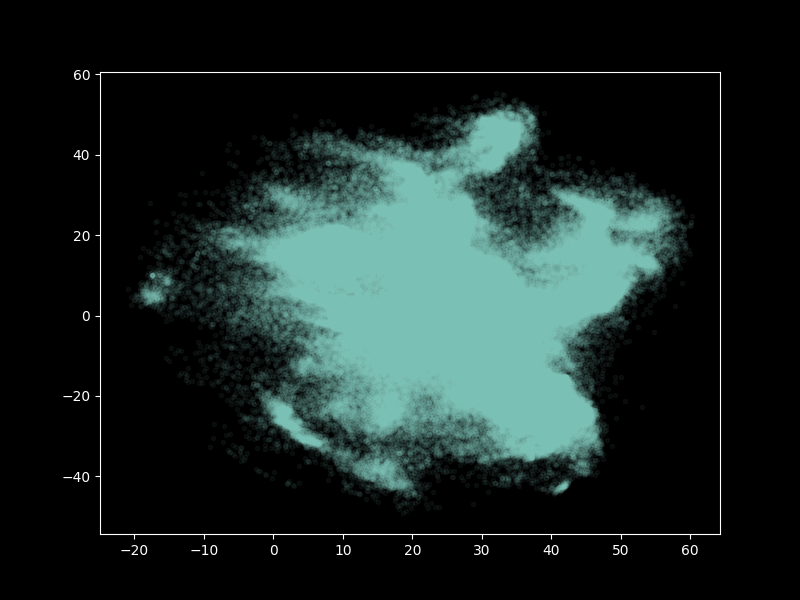

In [15]:
p.visualize_axes(*axes, savepath='out.png', alpha=.05)
from IPython.display import Image
Image(filename='out.png')

In [16]:
mask = p.dataset['labels'].correct_length_mask()

In [17]:
reprs, ds = p.reprs[mask], p.dataset[mask]

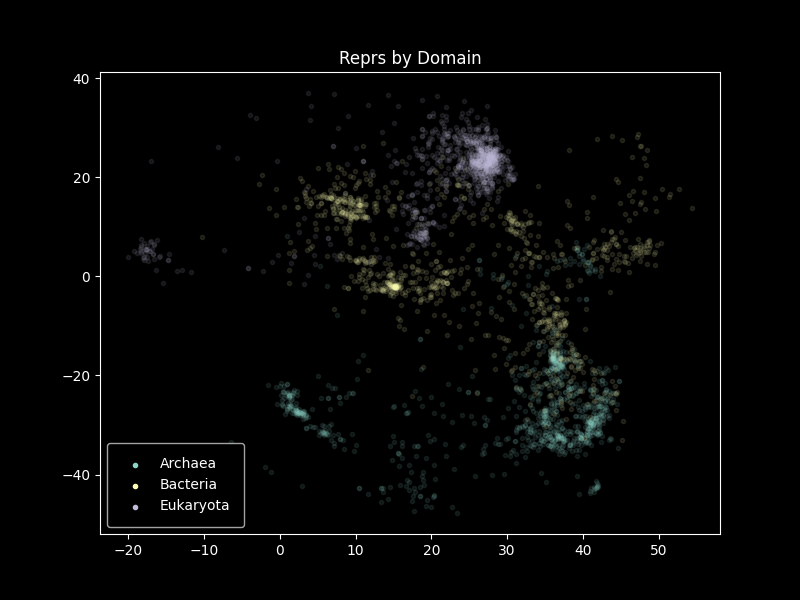

In [18]:
from SeqRep.visualize import reprs_by_label
reprs_by_label(reprs[:, axes], ds, 'Domain', 'Reprs by Domain', savepath='out.png')
from IPython.display import Image
Image(filename='out.png')

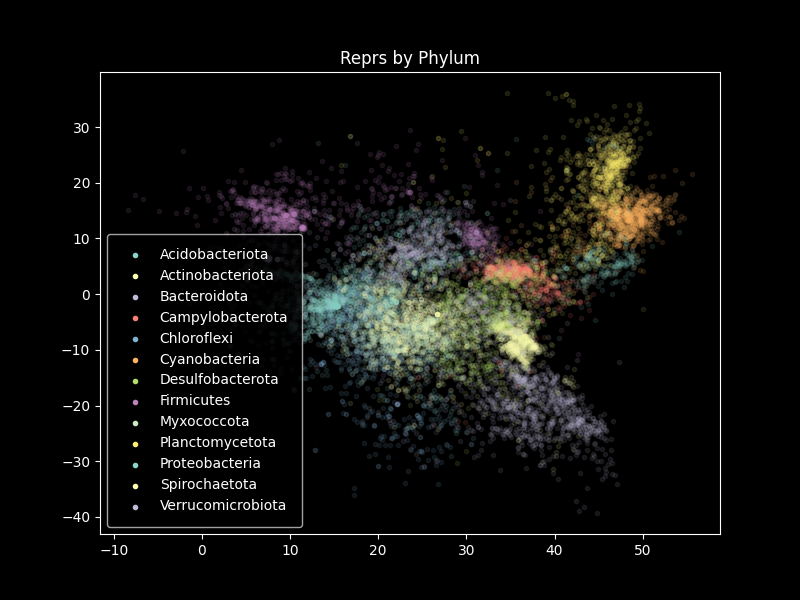

In [19]:
from SeqRep.visualize import reprs_by_label
reprs_by_label(reprs[:, axes], ds, 'Phylum', 'Reprs by Phylum', savepath='out.png',
               mask=ds['labels'].label_mask('Domain', 'Bacteria'), filter=2000)
from IPython.display import Image
Image(filename='out.png')

In [6]:
import numpy as np
rng = np.random.default_rng()
query_seq = rng.choice(p.dataset['seqs'], 1)[0]
query_seq

'GCCUGGCAUGUUAAGUUAAGCUUUUUACGGUGAAACUGCGAAGGCUCAUUCAAACAGUUAUAGUUUAUUUGAGGUCCUCACUAUUGGAUCACCGUGGUAAUUCUAGAGCUAAUACACGCGUCAAGACCCGACUUCUUGGAAGGGUGUAUUUAUAGAUAAGAACCAAUCCACGCUCCGCAUGGUGUUGUGGCGAUUCAUAAUAACUGAUCGAAUCGCAUGUCUUCGGACGGCGAUGUAUCAUUCAAGUUUCUGACCUAUCAGCUUCCGACGGUAGGGUAUUGGCCUACCGUGGCAAUGACGGGUAACGGGGAAUUAGGGUUCGAUUCCGGAGAGGGAGCCUGAGAAACGGCUACCACAUCUAAGGAAGGCAGCAGGCGCGCAAAUUACCCAAUCCUGACACAGGGAGGUAGUGACAAGAAAUAACAAUACAGGGCAUUUAUGUCUUGUAAUUGGAAUGAGUAGAAUUUAAAACCCUUUACAAGUAUCAAUUGGAGGGCAAGUCUGGUGCCAGCAGCCGCGGUAAUUCCAGCUCCAAUAGCGUAUAUUAAAGUUGUUGCAGUUAAAAAGCUCGUAGUUGGAUUUCUGCUGAAGACGACCGGUGCGCCCUCGGGUGUUUACCUGGUUCGGCUUCGGCAUUCUUCUGGGGAACGCACGUGCACUUGAAUGUGUGCUGCGGUAUCCAGAACCUUUACUUUGAGAAAAUUAGAGUGUUUCAAGCAGGCAUUUGCCUUGAAUACUGCAGCAUGGAAUAAUAAGAUAGGACUUUAGUCCUAGCUUGUUGGUUUCUGGGACUGAAGUAAUGAUUAAUAGGGAUAGUUGGGGGCAUUCGUAUUUAACUGUCAGAGGUGAAAUUCUUGGAUUUGUUAAAGACGAACUACUGCGAAAGCAUUUGCCAAGGAUGUUUUCAUUAAUCAAGAACGAAAGUUAGGGGAUCGAAGACGAUCAGAUACCGUCCUAGUCUUAACCAUAAACUAUGCCGACUAGAGAUUGGAGGUCGUU

In [39]:
dists, results = p.search(query_seq, n_neighbors=500)

100%|██████████| 1/1 [00:00<00:00, 813.80it/s]


1/1 [==============================] - 0s 146ms/step


2023-06-05 21:49:29.020083: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:776] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Did not find a shardable source, walked to a node which is not a dataset: name: "FlatMapDataset/_9"
op: "FlatMapDataset"
input: "PrefetchDataset/_8"
attr {
  key: "Targuments"
  value {
    list {
    }
  }
}
attr {
  key: "_cardinality"
  value {
    i: -2
  }
}
attr {
  key: "f"
  value {
    func {
      name: "__inference_Dataset_flat_map_slice_batch_indices_190153"
    }
  }
}
attr {
  key: "metadata"
  value {
    s: "\n\023FlatMapDataset:1057"
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: -1
        }
      }
    }
  }
}
attr {
  key: "output_types"
  value {
    list {
      type: DT_INT64
    }
  }
}
experimental_type {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_DATASET
    args {
      type_id: TFT_PR

In [15]:
enc = p.transform([query_seq])

100%|██████████| 1/1 [00:00<00:00, 1175.86it/s]


1/1 [==============================] - 0s 153ms/step


2023-06-05 21:13:44.088529: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:776] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Did not find a shardable source, walked to a node which is not a dataset: name: "FlatMapDataset/_9"
op: "FlatMapDataset"
input: "PrefetchDataset/_8"
attr {
  key: "Targuments"
  value {
    list {
    }
  }
}
attr {
  key: "_cardinality"
  value {
    i: -2
  }
}
attr {
  key: "f"
  value {
    func {
      name: "__inference_Dataset_flat_map_slice_batch_indices_189551"
    }
  }
}
attr {
  key: "metadata"
  value {
    s: "\n\022FlatMapDataset:969"
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: -1
        }
      }
    }
  }
}
attr {
  key: "output_types"
  value {
    list {
      type: DT_INT64
    }
  }
}
experimental_type {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_DATASET
    args {
      type_id: TFT_PRO

In [30]:
%timeit p.index.query(enc, k=500)

1.58 ms ± 2.29 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [40]:
[i['raw_headers'] for i in results]

['KC486616.1.1641 Eukaryota;SAR;Alveolata;Protalveolata;Colpodellida;Colpodella;uncultured Colpodellidae',
 'KC486544.1.1640 Eukaryota;SAR;Alveolata;Protalveolata;Colpodellida;Colpodella;uncultured Colpodellidae',
 'KC486499.1.1646 Eukaryota;SAR;Alveolata;Protalveolata;Colpodellida;Colpodella;uncultured Colpodellidae',
 'KC487736.1.1624 Eukaryota;SAR;Alveolata;Protalveolata;Colpodellida;Colpodella;uncultured Colpodellidae',
 'KC488141.1.1639 Eukaryota;SAR;Alveolata;Protalveolata;Colpodellida;Colpodella;uncultured Colpodellidae',
 'KC488116.1.1634 Eukaryota;SAR;Alveolata;Protalveolata;Colpodellida;Colpodella;uncultured Colpodellidae',
 'KC486062.1.1630 Eukaryota;SAR;Alveolata;Protalveolata;Colpodellida;Colpodella;uncultured Colpodellidae',
 'KC488125.1.1631 Eukaryota;SAR;Alveolata;Protalveolata;Colpodellida;Colpodella;uncultured Colpodellidae',
 'KC487977.1.1634 Eukaryota;SAR;Alveolata;Protalveolata;Colpodellida;Colpodella;uncultured Colpodellidae',
 'KC487881.1.1645 Eukaryota;SAR;Alveo

In [9]:
[i['labels'] for i in results]

[array(['Eukaryota', 'SAR', 'Alveolata', 'Protalveolata', 'Colpodellida',
        'Colpodella', 'uncultured Colpodellidae'], dtype='<U24'),
 array(['Eukaryota', 'SAR', 'Alveolata', 'Protalveolata', 'Colpodellida',
        'Colpodella', 'uncultured Colpodellidae'], dtype='<U24'),
 array(['Eukaryota', 'SAR', 'Alveolata', 'Protalveolata', 'Colpodellida',
        'Colpodella', 'uncultured Colpodellidae'], dtype='<U24'),
 array(['Eukaryota', 'SAR', 'Alveolata', 'Protalveolata', 'Colpodellida',
        'Colpodella', 'uncultured Colpodellidae'], dtype='<U24'),
 array(['Eukaryota', 'SAR', 'Alveolata', 'Protalveolata', 'Colpodellida',
        'Colpodella', 'uncultured Colpodellidae'], dtype='<U24'),
 array(['Eukaryota', 'SAR', 'Alveolata', 'Protalveolata', 'Colpodellida',
        'Colpodella', 'uncultured Colpodellidae'], dtype='<U24'),
 array(['Eukaryota', 'SAR', 'Alveolata', 'Protalveolata', 'Colpodellida',
        'Colpodella', 'uncultured Colpodellidae'], dtype='<U24'),
 array(['Eukaryota',

In [47]:
len(p.dataset)

510508

In [49]:
len(query_seq)

1413